In [1]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr  
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 

sns.set_style(style='white')
sns.set_context(context ='paper')

pd.set_option('max_columns',50)
pd.set_option('max_rows',500)

font_path = 'NanumSquareRoundR.ttf'
fontprop = fm.FontProperties(fname=font_path, size = 15)

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',999)

In [2]:
_all = pd.read_csv('all.csv', encoding = 'euc-kr')
not_all = pd.read_csv('not_all.csv', encoding = 'euc-kr')

In [3]:
PM10_day = pd.read_csv('PM10_day.csv',encoding = 'euc-kr')
PM10_month = pd.read_csv('PM10_month_2018.csv',encoding = 'euc-kr')

In [4]:
dic = {'Apr-18' : 4,
'Aug-18' : 8,
'Feb-18' :  2, 
'Jan-18' : 1,
'Jul-18' : 7,
'Jun-18' : 6,
'Mar-18' :3 , 'May-18'  :5,
'Oct-18' : 10,'Sep-18' : 9}

In [5]:
PM10_month['일자'] = PM10_month['일자'].map(dic)

# 월별 비교

## 2018년 PM10 과 하이마트 판매량 (1월~10월)

Text(0.5,0,'월')

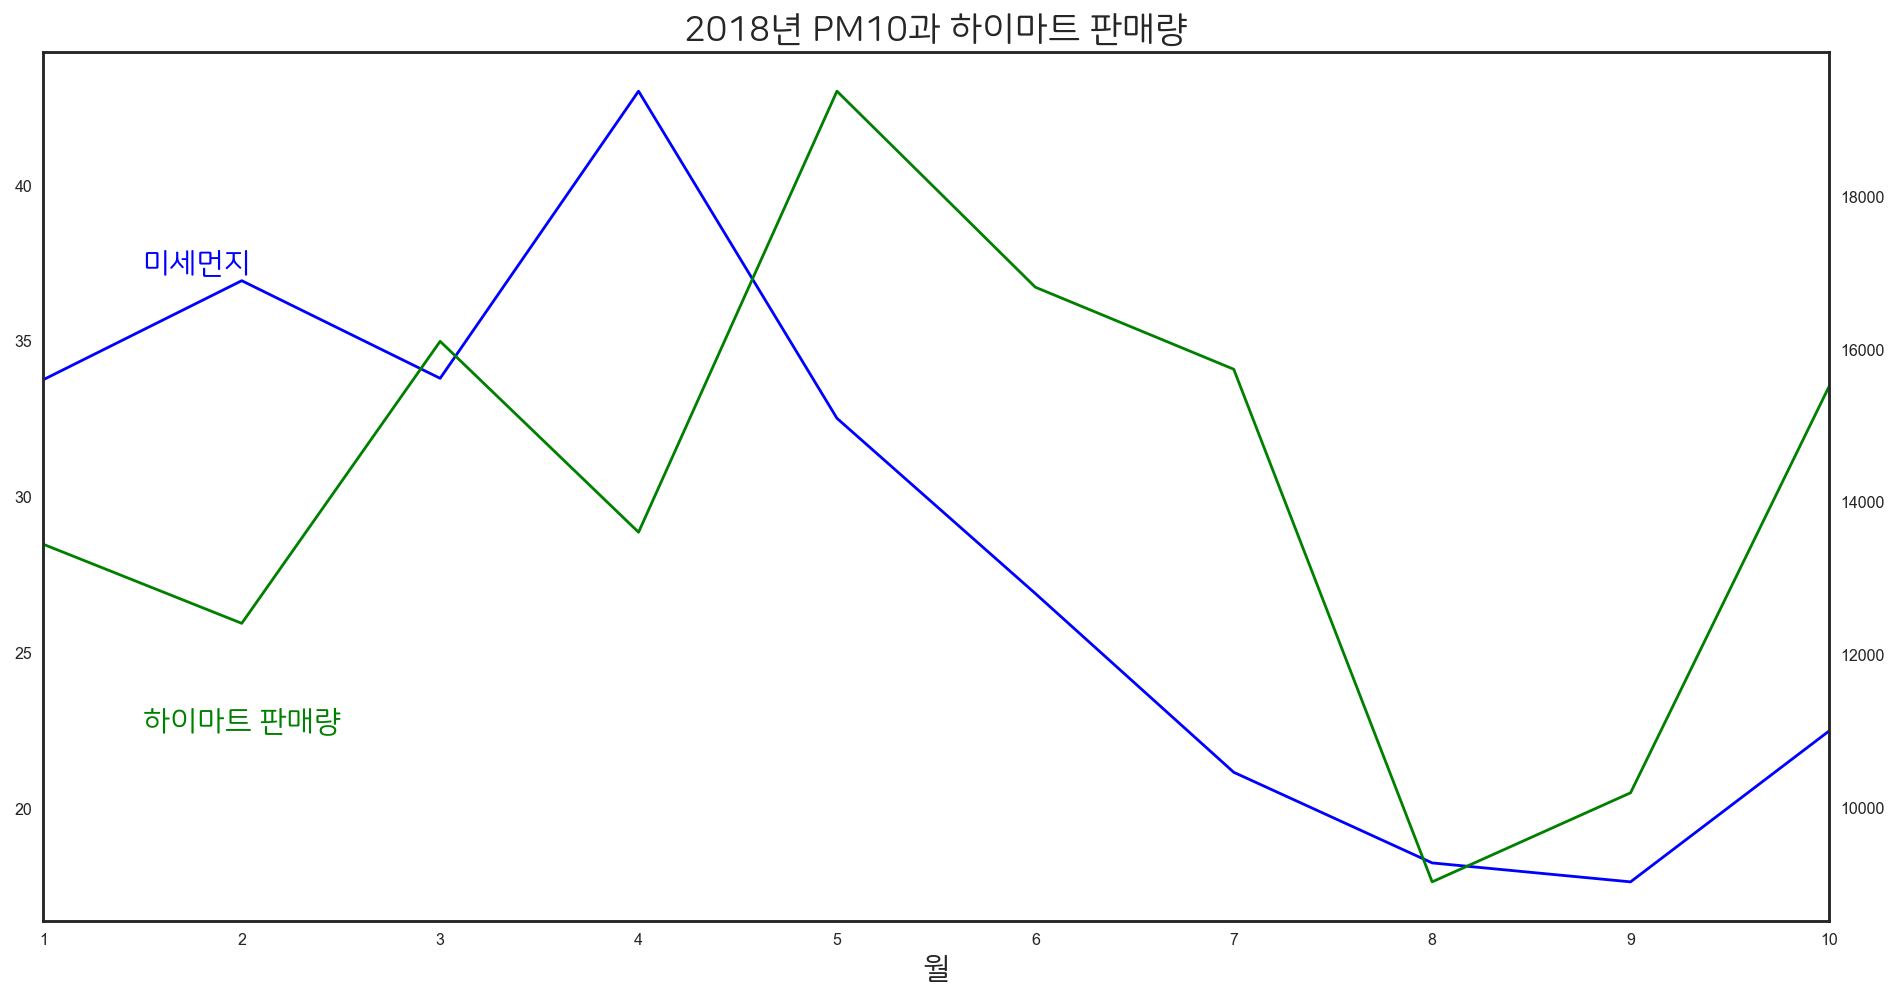

In [9]:
plt.figure(figsize = (16,8))
ax1 = PM10_month.groupby('일자')['미세먼지농도(㎍/㎥)'].mean().plot(color = 'b')
ax2 = ax1.twinx()
ax2.plot([1,2,3,4,5,6,7,8,9,10], _all['하이마트'],color = 'g')
plt.text(1.5,17000,'미세먼지',fontproperties = fontprop, color = 'b')
plt.text(1.5,11000,'하이마트 판매량',fontproperties = fontprop, color = 'g')
plt.title('2018년 PM10과 하이마트 판매량',fontproperties = fontprop, fontsize = 18)
ax1.set_xlabel('월',fontproperties = fontprop)

## 2018년 PM10 과 GFK 판매량 (1월~9월)

Text(0.5,0,'월')

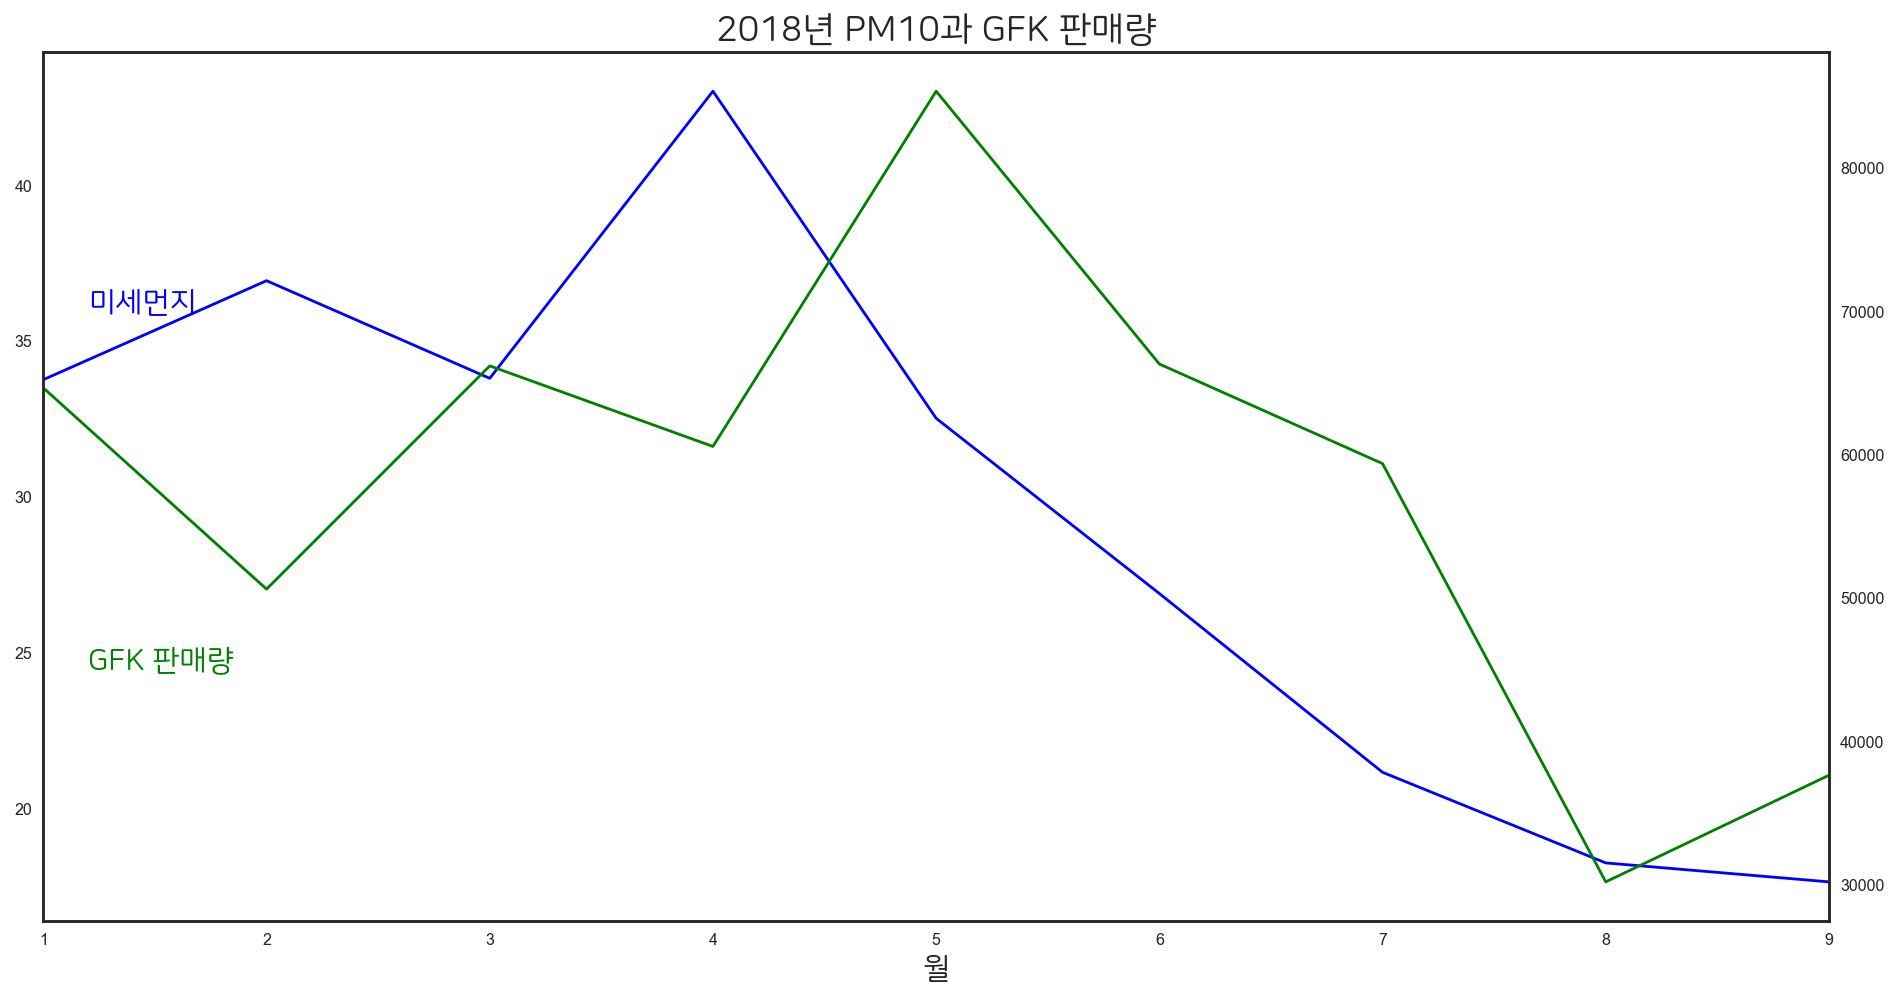

In [10]:
plt.figure(figsize = (16,8))
ax1 = PM10_month.groupby('일자')['미세먼지농도(㎍/㎥)'].mean()[0:9].plot(color = 'b')
ax2 = ax1.twinx()
ax2.plot([1,2,3,4,5,6,7,8,9], _all['GFK'][0:9],color = 'g')
plt.text(1.2,70000,'미세먼지',fontproperties = fontprop, color = 'b')
plt.text(1.2,45000,'GFK 판매량',fontproperties = fontprop, color = 'g')
plt.title('2018년 PM10과 GFK 판매량',fontproperties = fontprop, fontsize = 18)
ax1.set_xlabel('월',fontproperties = fontprop)

### 시각화 결과를 보면 건조기 판매량이 전월의 미세먼지 수치의 영향을 받는 것으로 보여집니다.
### 따라서 미세먼지 월별 데이터를 하나씩 뒤로 밀어서 상관계수를 계산했습니다.
- '미세먼지 1월~8월' 과 '판매량 2월~9월' 분석

In [11]:
GFK = list(_all['GFK'][1:9])
#2월~9월

In [12]:
PM10_1 = list(PM10_month.groupby('일자')['미세먼지농도(㎍/㎥)'].mean()[0:8])
#1월~8월

In [13]:
pearsonr(PM10_1, GFK)

(0.8996406101654763, 0.0023406591068957806)

In [14]:
mart = list(_all['하이마트'][1:])
#2월~10월

In [15]:
PM10_2 = list(PM10_month.groupby('일자')['미세먼지농도(㎍/㎥)'].mean()[0:9])
#1월~9월

In [16]:
pearsonr(PM10_2, mart)

(0.6430859267809542, 0.06171260144694275)

### 이를 고려한 결과 상관계수는' GFK 0.89, 하이마트 0.64 ' 로 상당히 유의미하다고 할 수 있습니다.

# 일별

In [17]:
day_dust = PM10_day.groupby('일자')['미세먼지농도(㎍/㎥)'].mean()[10:-1]

In [18]:
dust_mean = list()
i = 0 
while i < len(day_dust):
    dust_mean.append(day_dust[i:i+7].mean())
    i = i + 7

In [19]:
dust_mean 

[17.384892138673653,
 21.377126608219044,
 14.17371497550069,
 18.958463069022077,
 21.56361149202764,
 25.182999247129683,
 25.98726708074534,
 25.488819875776397,
 34.54901723535264]

In [20]:
not_all['합'] = not_all['온라인'] + not_all['하이마트']

In [21]:
day_selling = not_all[10:].fillna(0)[['일자','합']]

In [22]:
day_sum = list()
i = 0 
while i < len(day_selling):
    day_sum.append(day_selling[i:i+7].합.sum())
    i = i + 7

In [23]:
day_sum

[143.0, 55.0, 247.0, 255.0, 246.0, 308.0, 321.0, 397.0, 301.0]

Text(0.5,0,'주')

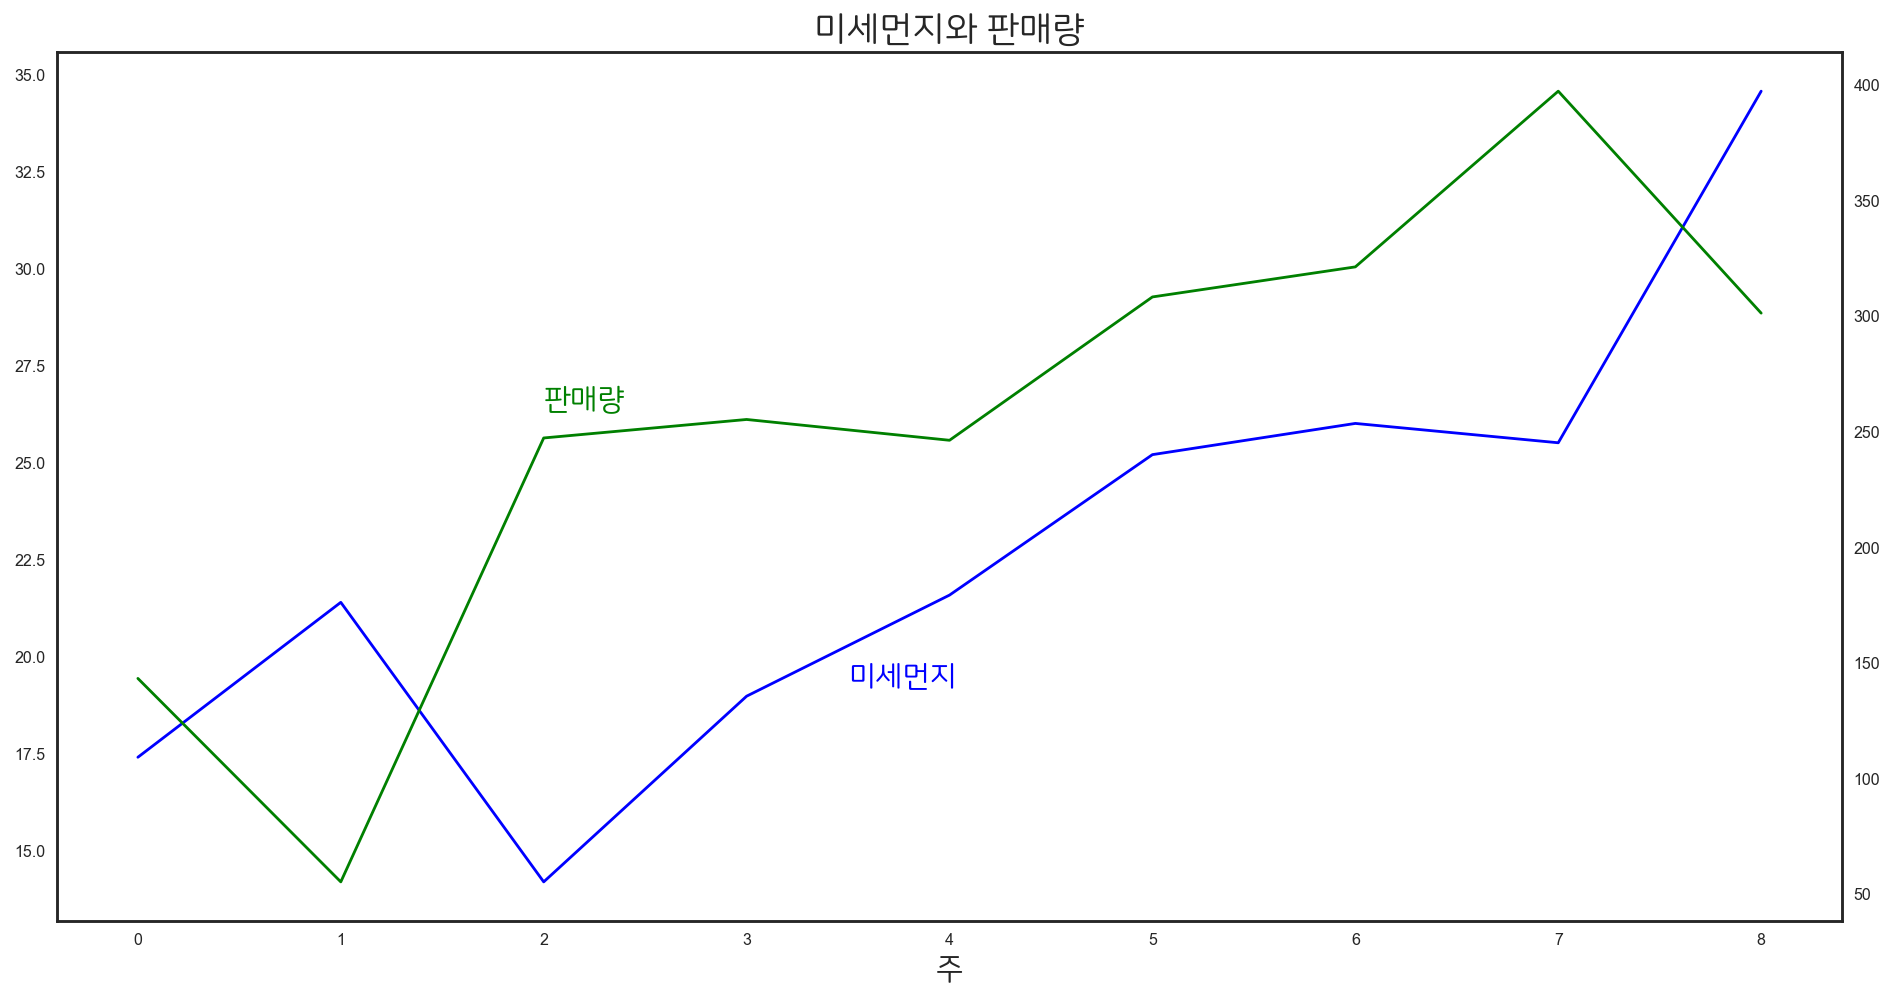

In [24]:
fig, ax1 = plt.subplots(figsize = (16,8))
ax1.plot([0,1,2,3,4,5,6,7,8], dust_mean,color = 'b')
ax2 = ax1.twinx()
ax2.plot([0,1,2,3,4,5,6,7,8], day_sum,color = 'g')
plt.text(3.5,140,'미세먼지',fontproperties = fontprop, color = 'b')
plt.text(2,260,'판매량',fontproperties = fontprop, color = 'g')
plt.title('미세먼지와 판매량',fontproperties = fontprop, fontsize = 18)
ax1.set_xlabel('주',fontproperties = fontprop)

In [25]:
#9월11일부터 11월12일까지 7일씩 잘라서 분석
pearsonr(dust_mean[:-1], day_sum[1:])

(0.6576718742710719, 0.07630563890474934)

### 이를 고려한 결과 상관계수는' 온라인, 하이마트 합계(7일씩 계산) 0.65 ' 로 상당히 유의미하다고 할 수 있습니다.